# Importing Libraries 

In [19]:
from typing import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Read csv file and displaying all column names

In [39]:
covid_Df = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv")
print(covidDf.columns)

Index(['data_as_of', 'start_date', 'end_date', 'aggregate_group', 'year',
       'month', 'state', 'illness_condition_group', 'illness_condition',
       'ICD-10_codes', 'age_group', 'death_count', 'number_of_mentions',
       'flag'],
      dtype='object')


# Display Dataset

In [40]:
covid_Df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,863.0,904.0,NaN
1,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,3872.0,3992.0,NaN
2,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,10179.0,10522.0,NaN
3,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,25876.0,26746.0,NaN
4,10/31/2021,01/01/2020,10/30/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,56709.0,58452.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310495,10/31/2021,06/01/2021,06/30/2021,By Month,2021.0,6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,35.0,35.0,NaN
310496,10/31/2021,07/01/2021,07/31/2021,By Month,2021.0,7.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,29.0,29.0,NaN
310497,10/31/2021,08/01/2021,08/28/2021,By Month,2021.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,310.0,310.0,NaN
310498,10/31/2021,09/01/2021,09/30/2021,By Month,2021.0,9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,265.0,265.0,NaN


# Data Cleaning

# Renaming dataframe columns

In [41]:
covid_Df.rename(columns={'Data As Of': 'data_as_of', 'Start Date': 'start_date','End Date' : 'end_date',
                        'Group' :'aggregate_group' , 'Year' : 'year', 'Month' : 'month', 'State' : 'state',
                         'Condition Group' : 'illness_condition_group', 'Condition' : 'illness_condition',
                     'ICD10_codes' : 'ICD-10_codes', 'Age Group' : 'age_group','COVID-19 Deaths' : 'death_count',
                        'Number of Mentions' :'number_of_mentions', 'Flag' :'flag'
                       }, inplace=True)

# Dropping blank Death Count which has been suppressed in accordance with NCHS confidentiality standards.

In [56]:
covidDf = covid_Df[(covid_Df.flag != 'One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.')]

# Dropping Irrelevant columns

In [60]:
covidDf = covidDf.drop('data_as_of',1)

In [61]:
covidDf = covidDf.drop('flag',1)

# Replacing NaN value for column Year and Month with NA

In [77]:
covidDf['year'] = covidDf['year'].fillna('NA')

In [78]:
covidDf['month'] = covidDf['month'].fillna('NA')

# EDA

# Covid19 Death toll in USA by Age group till Oct'21 by NCHS

In [79]:
DF2 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.illness_condition =='COVID-19') & (covidDf.age_group != 'All Ages') ]  

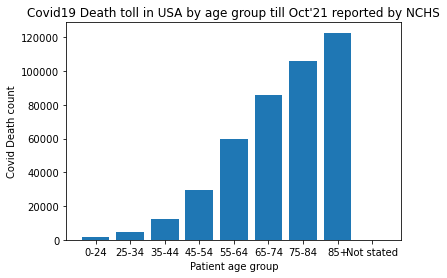

In [80]:
plt.bar(DF2['age_group'],DF2['death_count'])
plt.ylabel("Covid Death count")
plt.xlabel("Patient age group")
plt.title("Covid19 Death toll in USA by age group till Oct'21 reported by NCHS",loc='center')
plt.show()


# Various illness conditions contributed to covid death in USA

In [81]:
DF1 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state == 'United States') & (covidDf.age_group =='All Ages') & (covidDf.year ==2021) & (covidDf.illness_condition !='COVID-19')]  

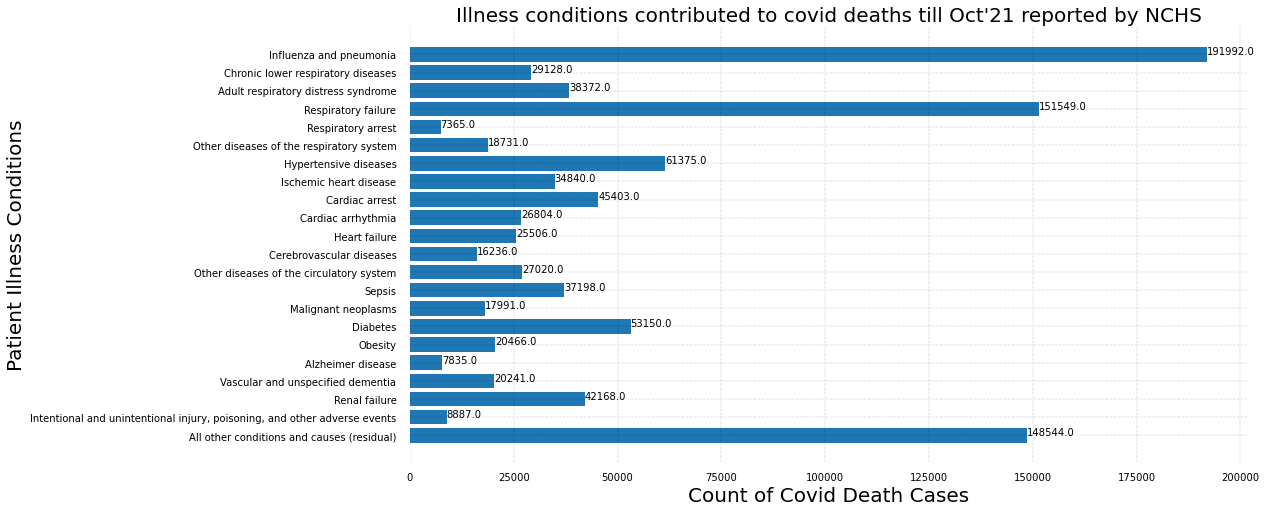

In [82]:
fig, ax = plt.subplots(figsize =(15, 8))
ax.barh(DF1['illness_condition'],DF1['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("Patient Illness Conditions")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Illness conditions contributed to covid deaths till Oct'21 reported by NCHS",
             loc='center' , fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()


# Covid death count in US states in year 2020 as reported by NCHS

In [51]:
DF3 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group =='All Ages')  & (covidDf.illness_condition =='COVID-19')  & (covidDf.year ==2020) ] 


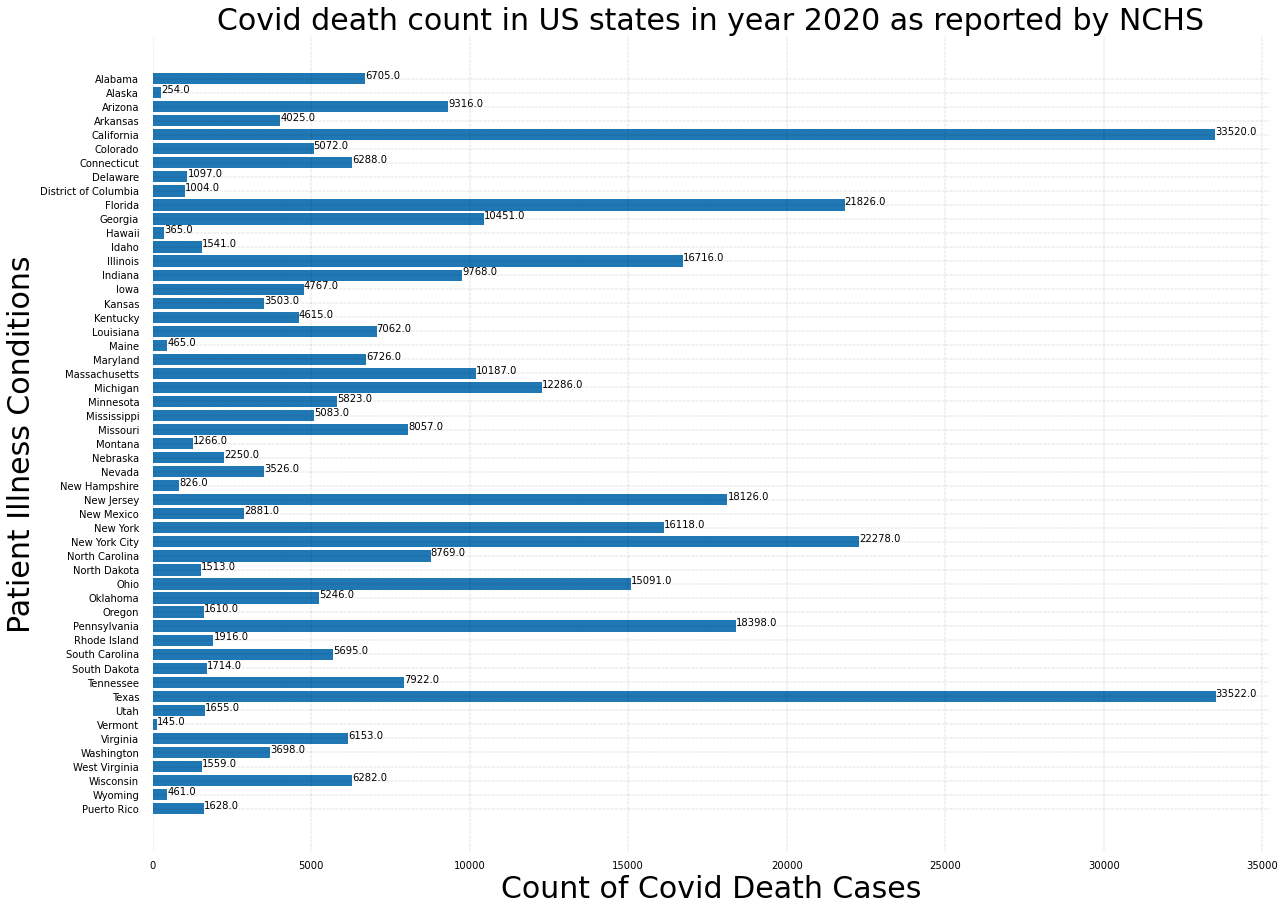

In [87]:
fig, ax = plt.subplots(figsize =(20, 15))
ax.barh(DF3['state'],DF3['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("Patient Illness Conditions")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Covid death count in US states in year 2020 as reported by NCHS",
             loc='center' , fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
plt.show()


# Covid death count in US states in year 2021 till Oct'21 as reported by NCHS

In [84]:
DF4 = covidDf[(covidDf.aggregate_group == 'By Year') & (covidDf.state != 'United States') & (covidDf.age_group =='All Ages')  & (covidDf.illness_condition =='COVID-19')  & (covidDf.year ==2021) ] 


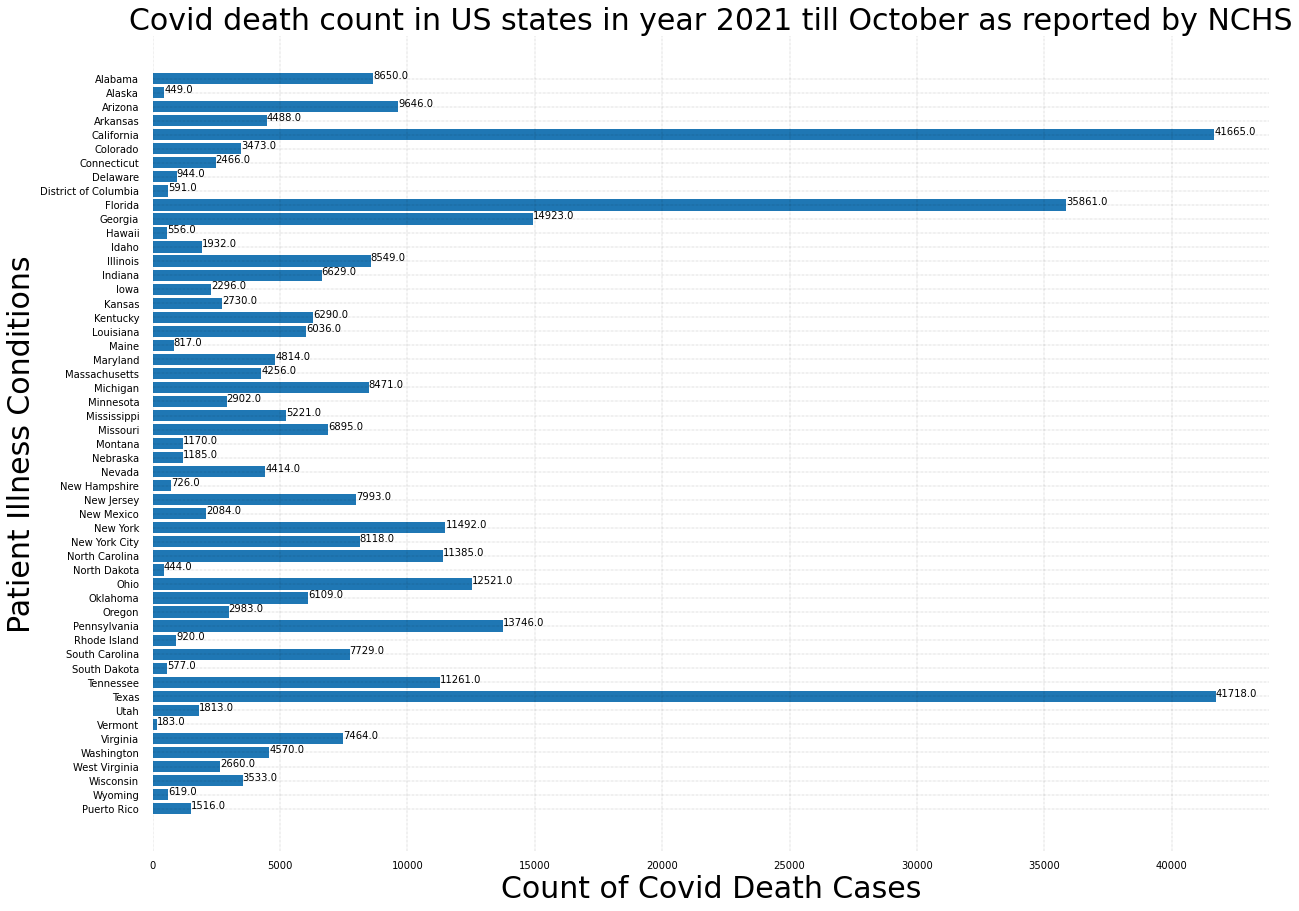

In [88]:
fig, ax = plt.subplots(figsize =(20, 15))
ax.barh(DF4['state'],DF4['death_count'])

for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 6)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='Black',linestyle ='-.', linewidth = 0.4,alpha = 0.3)

ax.invert_yaxis()

for p in ax.patches:
	plt.text(p.get_width()+0.3, p.get_y()+0.4,str(round((p.get_width()), 2)),fontsize = 10,color ='Black')

ax.set_ylabel("Patient Illness Conditions")
ax.set_xlabel("Count of Covid Death Cases")
ax.set_title("Covid death count in US states in year 2021 till October as reported by NCHS",
             loc='center' , fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
plt.show()
